In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv

In [208]:
# Load data from netlogo's behaviorspace "spreadsheet" output
def loadBehaviorspace(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = float(_data[i][j])
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=float)
            
    return (metadata, data)

In [352]:
metadata,data = loadBehaviorspace("./behaviorspace_data/tau_adaptive-agent-2_2_0.5_0.3_pools.csv")

## Final total wealth, across tau


intercept = 4446.0
slope =     556.0


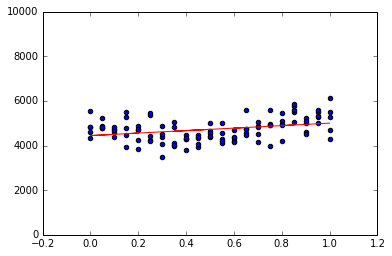

p = 0.0005805141384379427
r = 0.33
stderr = 156.6


In [353]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(final_tau, final_total_wealth)

print ""
print "intercept =", round(intercept)
print "slope =    ", round(slope)

plt.plot(final_tau, intercept + slope*final_tau, 'r', label='fitted line')
plt.scatter(final_tau, final_total_wealth)
plt.ylim(0, 10000)
plt.show()

print "p =", p_value
print "r =", round(r_value, 3)
print "stderr =",round(std_err, 1)

...

## Final wealth distribution, across tau
Per agent type

In [341]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_wealth_0 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 0 ]'])
final_wealth_1 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 1 ]'])
#final_wealth_2 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 2 ]'])
#final_wealth_3 = np.extract(final_step_mask, data['sum [wealth] of turtles with [ strategy = 3 ]'])

plt.scatter(final_tau, final_wealth_0, color='blue')
plt.scatter(final_tau, final_wealth_1, color='red')
#plt.scatter(final_tau, final_wealth_2, color='red')
#plt.scatter(final_tau, final_wealth_3, color='green')
plt.show()

KeyError: 'sum [wealth] of turtles with [ strategy = 0 ]'

## Pool breakdowns on final step

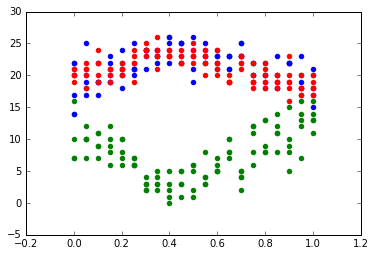

In [354]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_pool_count_0 = np.extract(final_step_mask, data['get-for-pool recent-agent-history 0'])
final_pool_count_1 = np.extract(final_step_mask, data['get-for-pool recent-agent-history 1'])
final_pool_count_2 = np.extract(final_step_mask, data['get-for-pool recent-agent-history 2'])


plt.scatter(final_tau, final_pool_count_0, color='green')
plt.scatter(final_tau, final_pool_count_1, color='blue')
plt.scatter(final_tau, final_pool_count_2, color='red')
plt.show()

In [259]:
def break_by_agent_group():
    final_step_mask = [step == 100 for step in data['[step]']]
    final_tau = data['tau'] * final_step_mask
    final_wealth_0 = data['sum [wealth] of turtles with [ strategy = 0 ]'] * final_step_mask
    final_wealth_1 = data['sum [wealth] of turtles with [ strategy = 1 ]'] * final_step_mask
    final_wealth_2 = data['sum [wealth] of turtles with [ strategy = 2 ]'] * final_step_mask
    final_wealth_3 = data['sum [wealth] of turtles with [ strategy = 3 ]'] * final_step_mask

    plt.scatter(final_tau, final_wealth_0, color='blue')
    plt.scatter(final_tau, final_wealth_1, color='red')
    plt.scatter(final_tau, final_wealth_2, color='green')
    plt.scatter(final_tau, final_wealth_3, color='blue')
    plt.show()

In [232]:
np.extract(
    [True, False, True],
    [1,2,3]
)

array([1, 3])